* # Exploratory data analysis

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [7]:
cleaning = pd.read_csv("cleaning.csv",
                       parse_dates=['saleDate_b', 'valuationDate_b'])
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [8]:
cleaning.dtypes

address_b                      object
street_b                       object
streetName_b                   object
postalId_b                      int64
city_b                         object
valuationDate_b        datetime64[ns]
propertyValuation_b           float64
salePrice_b                   float64
paymentCash_b                 float64
salesYear_b                     int64
saleDate_b             datetime64[ns]
itemTypeName_b                 object
propertyType_b                 object
buildYear_b                     int64
areaResidential_b             float64
numberOfFloors_b              float64
floor_b                       float64
toilet.content_b               object
bath.content_b                 object
numberOfBathrooms_b           float64
energyMark_b                   object
SalesPeriod_b                 float64
latitude_b                    float64
longitude_b                   float64
unitUsage_bd                   object
rebuildYear_bd                float64
area_bd     

* ## Sale Price statistics

2.1775181721787327
9.405685646755085


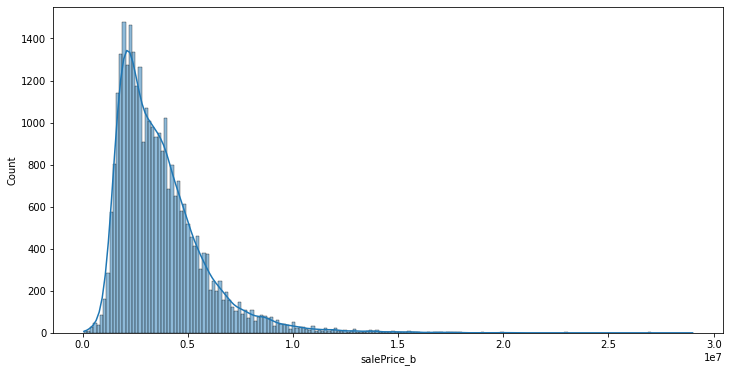

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(data=cleaning, x="salePrice_b", kde=True)
print(cleaning['salePrice_b'].skew())
print(cleaning['salePrice_b'].kurt())
# # We see how the response is distributed, right skewed with a heavy right tail.
# # This can also be seen on skewness and kurtosis (which are both positive)

In [10]:
cleaning['salePrice_b'].describe()

count    3.054600e+04
mean     3.705968e+06
std      2.116404e+06
min      6.000000e+04
25%      2.210000e+06
50%      3.235000e+06
75%      4.598000e+06
max      2.900000e+07
Name: salePrice_b, dtype: float64

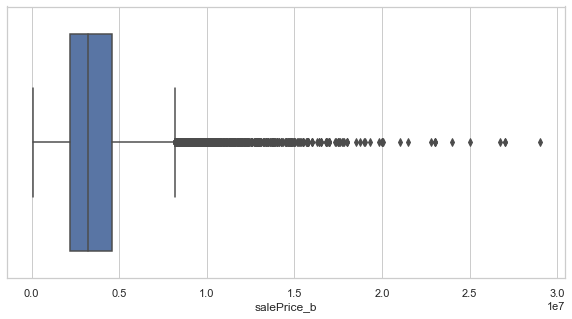

In [11]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=cleaning["salePrice_b"])
# # The heavy tale in the distribution therefore includes many outliers for the sale price.
# # The these will still be included since it is the response
# # But also true outliers that are very small. These we need to handle

* ### Sale Price development

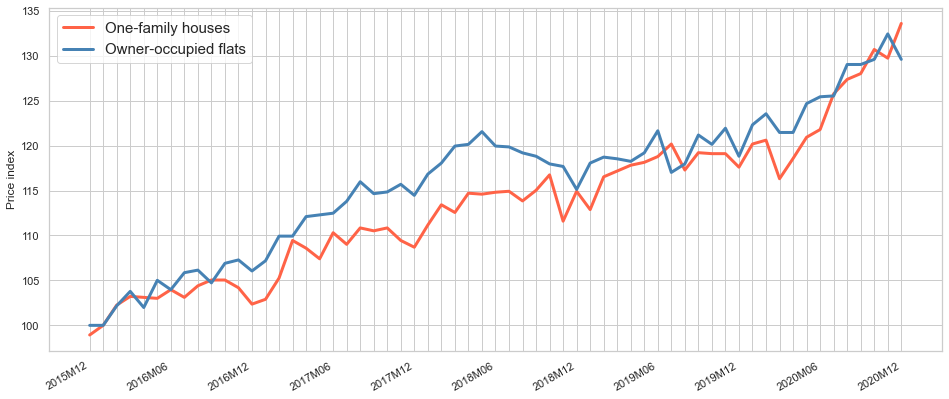

In [12]:
# # From EJ14 in Statbank, for capitol region of denmark only.
# # Shows that there is an upward trend in price development, meaning year will be a relevant predictor.

price_index = pd.read_csv('salePriceIndex.csv', delimiter=',', header=1, skiprows=1)
price_index.drop(price_index.columns[[0, 1]], axis = 1, inplace = True)
price_index = price_index.drop([0, 1]).T
price_index = price_index.rename(columns=price_index.iloc[0]).drop(price_index.index[0:1])
price_index['One-family houses'] = price_index['One-family houses'] * 100 / price_index.loc['2016M01','One-family houses']
price_index['Owner-occupied flats, total'] = price_index['Owner-occupied flats, total'] * 100 / price_index.loc['2016M01','Owner-occupied flats, total']

plt.rcParams["figure.figsize"] = (16,7)

fig, ax = plt.subplots()
plt.plot(price_index['One-family houses'], c ='tomato', linewidth=3, label='One-family houses')
plt.plot(price_index['Owner-occupied flats, total'], c ='steelblue', linewidth=3, label='Owner-occupied flats')

fig.autofmt_xdate()
plt.ylabel('Price index')
plt.legend(fontsize=15)
plt.rc('axes', labelsize=17)
xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%6 != 0:
        tick.label1.set_visible(False)

plt.show()

In [13]:
cleaning['quarter_b'] = cleaning['saleDate_b'].dt.to_period("Q")
cleaning['quarter_b'] = cleaning['quarter_b'].astype(str)

quarters = ['2016Q1','2016Q2','2016Q3','2016Q4',
            '2017Q1','2017Q2','2017Q3','2017Q4',
            '2018Q1','2018Q2','2018Q3','2018Q4',
            '2019Q1','2019Q2','2019Q3','2019Q4',
            '2020Q1','2020Q2','2020Q3','2020Q4']

total = cleaning['quarter_b'].value_counts()
total = total.reindex(index = quarters)
total

2016Q1    1067
2016Q2    1344
2016Q3    1291
2016Q4    1146
2017Q1    1397
2017Q2    1601
2017Q3    1557
2017Q4    1403
2018Q1    1449
2018Q2    1584
2018Q3    1496
2018Q4    1355
2019Q1    1360
2019Q2    1700
2019Q3    1756
2019Q4    1693
2020Q1    1592
2020Q2    1841
2020Q3    2109
2020Q4    1805
Name: quarter_b, dtype: int64

In [14]:
cleaning.dtypes

address_b                      object
street_b                       object
streetName_b                   object
postalId_b                      int64
city_b                         object
valuationDate_b        datetime64[ns]
propertyValuation_b           float64
salePrice_b                   float64
paymentCash_b                 float64
salesYear_b                     int64
saleDate_b             datetime64[ns]
itemTypeName_b                 object
propertyType_b                 object
buildYear_b                     int64
areaResidential_b             float64
numberOfFloors_b              float64
floor_b                       float64
toilet.content_b               object
bath.content_b                 object
numberOfBathrooms_b           float64
energyMark_b                   object
SalesPeriod_b                 float64
latitude_b                    float64
longitude_b                   float64
unitUsage_bd                   object
rebuildYear_bd                float64
area_bd     

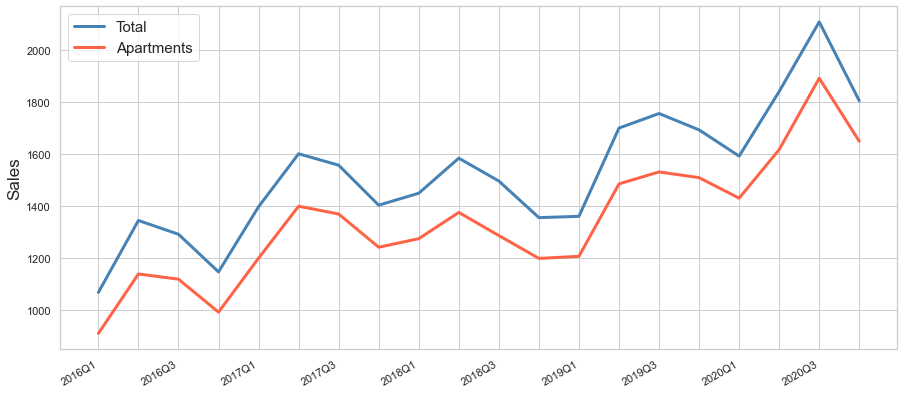

In [15]:
# # Seems to be cyclicality for all of them, so time of year, quarter, is a relevant variable.
# # Sales have increased over time, but that is due to the scraping process where multiple sales
# # for same address was sorted out.

cleaning['quarter_b'] = cleaning['saleDate_b'].dt.to_period("Q")
cleaning['quarter_b'] = cleaning['quarter_b'].astype(str)

quarters = ['2016Q1','2016Q2','2016Q3','2016Q4',
            '2017Q1','2017Q2','2017Q3','2017Q4',
            '2018Q1','2018Q2','2018Q3','2018Q4',
            '2019Q1','2019Q2','2019Q3','2019Q4',
            '2020Q1','2020Q2','2020Q3','2020Q4']

total = cleaning['quarter_b'].value_counts()
total = total.reindex(index = quarters)
apartments = cleaning.loc[cleaning['itemTypeName_b'] == 'Ejerlejlighed','quarter_b'].value_counts()
apartments = apartments.reindex(index = quarters)

plt.rcParams["figure.figsize"] = (15,7)
fig, ax = plt.subplots()

plt.plot(total, c ='steelblue', linewidth=3, label='Total')
plt.plot(apartments, c ='tomato', linewidth=3, label='Apartments')

fig.autofmt_xdate()
plt.ylabel('Sales')
plt.legend(fontsize=15)
plt.rc('axes', labelsize=20)
xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%2 != 0:
        tick.label1.set_visible(False)

plt.show()

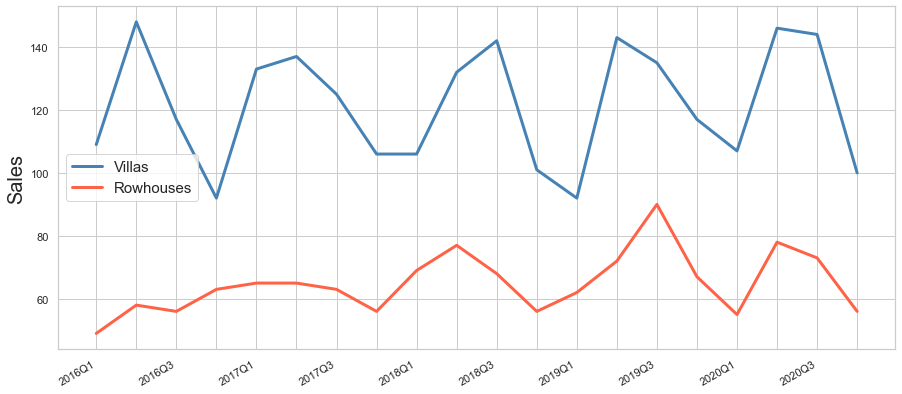

In [16]:
villa = cleaning.loc[cleaning['itemTypeName_b'] == 'Villa','quarter_b'].value_counts()
villa = villa.reindex(index = quarters)
rowhouse = cleaning.loc[cleaning['itemTypeName_b'] == 'Rækkehus','quarter_b'].value_counts()
rowhouse = rowhouse.reindex(index = quarters)

plt.rcParams["figure.figsize"] = (15,7)
fig, ax = plt.subplots()

plt.plot(villa, c ='steelblue', linewidth=3, label='Villas')
plt.plot(rowhouse, c ='tomato', linewidth=3, label='Rowhouses')

fig.autofmt_xdate()
plt.ylabel('Sales')
plt.legend(fontsize=15)
plt.rc('axes', labelsize=20)
xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%2 != 0:
        tick.label1.set_visible(False)

plt.show()



In [17]:
# # Has it actually become more expensive, or did the later ones just happen to be more expensive?
# # Look at the development in square meter price to see this

cleaning['squareMetrePrice_bd'] = cleaning.salePrice_b / cleaning.areaWeighted_bd
cleaning['squareMetrePrice_bd'].describe()

count     30546.000000
mean      40054.533044
std       10015.029947
min         264.164912
25%       33333.333333
50%       39196.428571
75%       46218.487395
max      250989.155920
Name: squareMetrePrice_bd, dtype: float64

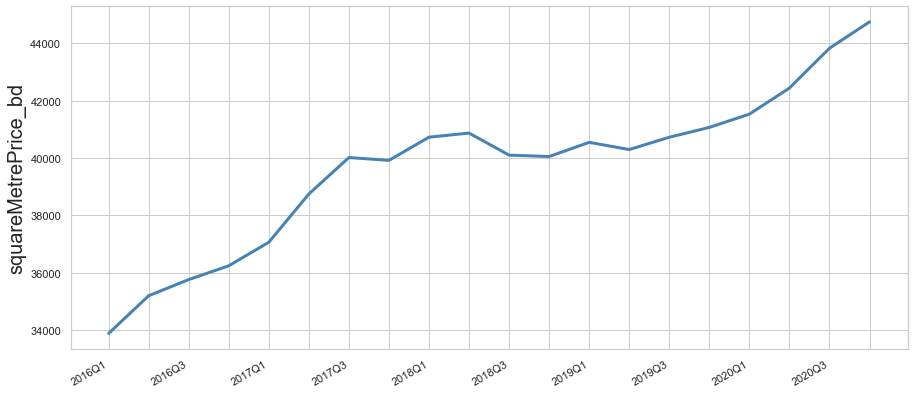

In [18]:
m2price = cleaning.groupby('quarter_b')['squareMetrePrice_bd'].mean()
plt.rcParams["figure.figsize"] = (15,7)
fig, ax = plt.subplots()

plt.plot(m2price, c ='steelblue', linewidth=3)


fig.autofmt_xdate()
plt.ylabel('squareMetrePrice_bd')
#plt.legend(fontsize=15)
plt.rc('axes', labelsize=20)
xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%2 != 0:
        tick.label1.set_visible(False)

plt.show()



In [19]:
# # It shows a clear trend in the square metre price as well,
# # but it is also faulty, since many outlier as can be seen in the boxplot

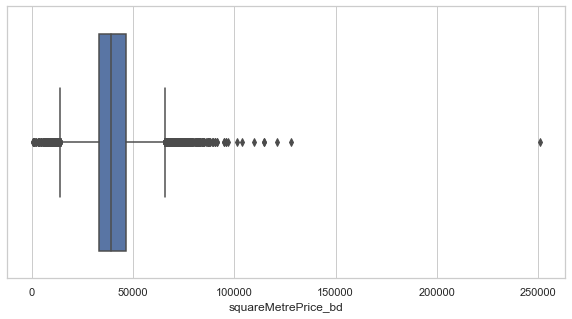

In [20]:

# # m2 price is good to find outliers, because it gives a more full view from the two arguably
# # most important variables.
# # This better captures, because if very high or low price corresponds with similarly high or low area,
# # then there is no problem

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=cleaning["squareMetrePrice_bd"])


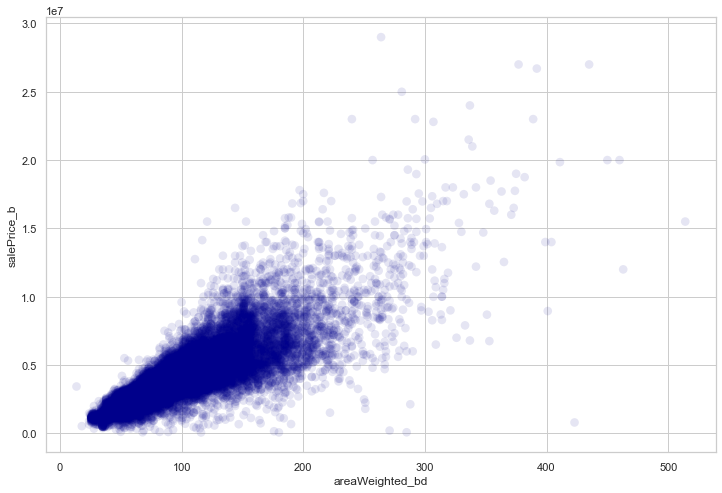

In [21]:
# # This scatterplot is another way to visualize the outliers, when both taking the area and the price into account.

plt.rcParams["figure.figsize"] = (12,8)

fig, ax = plt.subplots()

# Plot data
plt.scatter(cleaning['areaWeighted_bd'], cleaning['salePrice_b'], 
            edgecolors='none', alpha=0.1, c ='darkblue', s = 75)

# Change fontsize
#plt.rcParams['font.size'] = 18
plt.xlabel('areaWeighted_bd')
plt.ylabel('salePrice_b')
plt.show()

# # Here outliers likewise become apparant. 

In [22]:
# # Rule, can not be twice as big or 4 times smaller than the mean which is 

mean = cleaning['squareMetrePrice_bd'].mean()
len(cleaning.loc[(cleaning['squareMetrePrice_bd']> 2*mean) | (cleaning['squareMetrePrice_bd']< (1/4)*mean),:])
mean

# # Check her other rules, when have deleted the first.

40054.53304388223

In [23]:
outliers = cleaning.loc[(cleaning['squareMetrePrice_bd']> 2*mean) | (cleaning['squareMetrePrice_bd']< (1/4)*mean),:]
cleaning = cleaning.loc[~cleaning['address_b'].isin(outliers['address_b']),:]
# # Down to 30414

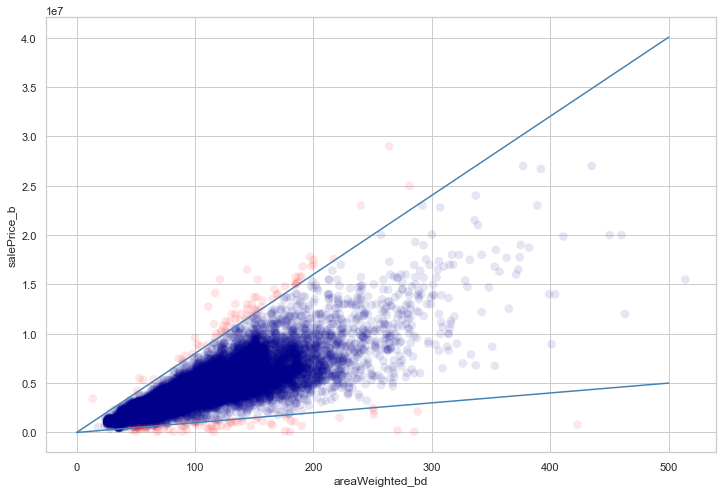

In [24]:
# # This scatterplot is another way to visualize the outliers, when both taking the area and the price into account.

plt.rcParams["figure.figsize"] = (12,8)

fig, ax = plt.subplots()

# Plot data
plt.scatter(cleaning['areaWeighted_bd'], cleaning['salePrice_b'], 
            edgecolors='none', alpha=0.1, c ='darkblue', s = 75)
plt.scatter(outliers['areaWeighted_bd'], outliers['salePrice_b'], 
            edgecolors='none', alpha=0.1, c ='red', s = 75)

x = np.array([0, 100, 200, 300, 400, 500])
plt.plot(x, (1/4)*mean*x, c ='steelblue')
plt.plot(x, 2*mean*x, c ='steelblue')

plt.rc('axes', labelsize=20)

# Change fontsize
#plt.rcParams['font.size'] = 18
plt.xlabel('areaWeighted_bd')
plt.ylabel('salePrice_b')
plt.show()


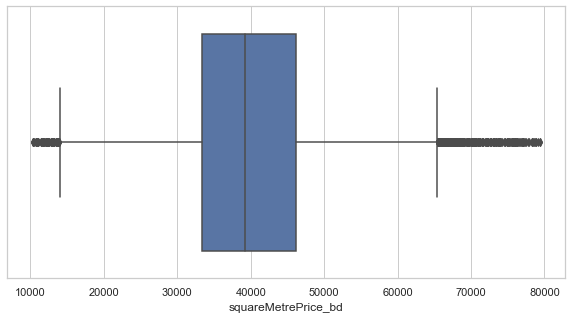

In [25]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=cleaning["squareMetrePrice_bd"])

# # Should make these into single figures, before and after outliers using m2price.

In [26]:
# # Before inspection of each should have an overview of the numerics 

# # Have to change basement to numeric first
# # Basement area
cleaning['areaBasement_bd']=cleaning.areaBasement_bd.replace({" m2": ""},regex=True)
cleaning['areaBasement_bd']=cleaning.areaBasement_bd.fillna(0)
cleaning['areaBasement_bd'] = cleaning['areaBasement_bd'].astype('float')

# # Have to change m above sea level first
cleaning['aboveSea_d']=cleaning.aboveSea_d.replace({" meter ": ""},regex=True)
cleaning['aboveSea_d'] = cleaning['aboveSea_d'].astype('float')

numerics = cleaning.select_dtypes(include=['float64', 'int64'])
numerics = numerics.drop(columns = ['postalId_b', 'AVM_pris_d', 'squareMetrePrice_bd'])
pd.options.display.float_format = "{:,.2f}".format
print(numerics.describe().T[['count','mean', 'min', 'max']].to_latex(index=True))

\begin{tabular}{lrrrr}
\toprule
{} &     count &         mean &        min &           max \\
\midrule
propertyValuation\_b & 30,414.00 & 1,908,024.48 &       0.00 & 94,000,000.00 \\
salePrice\_b         & 30,414.00 & 3,692,396.27 & 345,000.00 & 27,000,000.00 \\
paymentCash\_b       & 30,414.00 & 3,780,124.75 & 400,000.00 & 27,500,000.00 \\
salesYear\_b         & 30,414.00 &     2,018.18 &   2,016.00 &      2,020.00 \\
buildYear\_b         & 30,414.00 &     1,943.14 &   1,200.00 &      2,024.00 \\
areaResidential\_b   & 30,414.00 &        88.98 &      18.00 &        410.00 \\
numberOfFloors\_b    & 30,414.00 &         1.20 &       0.00 &         32.00 \\
floor\_b             & 30,414.00 &         1.95 &      -1.00 &         29.00 \\
numberOfBathrooms\_b & 30,414.00 &         1.09 &       1.00 &          5.00 \\
SalesPeriod\_b       & 30,414.00 &        88.81 &       0.00 &        993.00 \\
latitude\_b          & 30,414.00 &        55.68 &      55.62 &         55.73 \\
longitude\_b     

In [334]:
numerics.dtypes

propertyValuation_b    float64
salePrice_b            float64
paymentCash_b          float64
salesYear_b              int64
buildYear_b              int64
areaResidential_b      float64
numberOfFloors_b       float64
floor_b                float64
numberOfBathrooms_b    float64
SalesPeriod_b          float64
latitude_b             float64
longitude_b            float64
rebuildYear_bd         float64
area_bd                float64
areaBasement_bd        float64
areaWeighted_bd        float64
areaTotal_bd           float64
numberOfRooms_bd       float64
numberOfToilets_bd     float64
aboveSea_d             float64
turnoutVote_d          float64
school_h               float64
roadtrain_h            float64
junction_h             float64
daycare_h              float64
metro_h                float64
doctor_h               float64
soccerfield_h          float64
hospital_h             float64
busstop_h              float64
lake_h                 float64
supermarket_h          float64
pharmacy

* ## Inspection of each variable one-by-one

* #### Numerics

In [335]:
# # Property valuation
# # 7 houses with valuation zero are deleted, 274 with valuation way outside
cleaning = cleaning.loc[cleaning['propertyValuation_b']!=0]
len(cleaning.loc[(cleaning['propertyValuation_b'] > 4 * cleaning['salePrice_b']) \
                 | (cleaning['propertyValuation_b'] < (1/4) * cleaning['salePrice_b']),:]) # 274
cleaning = cleaning.loc[~(cleaning['propertyValuation_b'] > 4 * cleaning['salePrice_b']) \
                 & ~(cleaning['propertyValuation_b'] < (1/4) * cleaning['salePrice_b']),:]

len(cleaning)
# # Down to 30133

# # Sale price


30133

In [336]:
# # Cash payment

len(cleaning.loc[(cleaning['paymentCash_b'] > 4 * cleaning['salePrice_b']) \
                 | (cleaning['paymentCash_b'] < (1/4) * cleaning['salePrice_b']),:]) # 12
cleaning = cleaning.loc[~(cleaning['paymentCash_b'] > 4 * cleaning['salePrice_b']) \
                 & ~(cleaning['paymentCash_b'] < (1/4) * cleaning['salePrice_b']),:]
len(cleaning)

# # Some have cash payment very far from sales price
# # 12 are deleted, leaves us with 30122

30122

In [337]:
# # Sales year
# # Here 108 addresses were deleted earlier, because they were sold in 2021

# # Year built
# #There are 7 addresses with built year 1200, mostly from same street, these are deleted.
# # Also two that have year built after 2020
# # This also takes care of the ouliers in rebuilht year


cleaning = cleaning.loc[(cleaning['buildYear_b']>1200) & (cleaning['buildYear_b']<2021)]
len(cleaning)
# # Down to 30116

30116

In [338]:
# # Resedential area

# # Number of floors
cleaning['numberOfFloors_b'] = cleaning.numberOfFloors_b.astype('int')

# # There is a mixup how this has been reported.
# # Assuming this variable means how many floors the apartment has,
# # there has clearly been misunderstanding in reporting.
# # Could assume about values, but would rather not use variable, since 3300 are said to have more than 2 floors.
# # Fx when the variable is 15, then what to assume? Most likely single floor apartment in tall building

# # Floor
cleaning['floor_b'] = cleaning.floor_b.astype('int')

# # Some have floor -1, which must be assumed to be basement

In [339]:
# # Number of bathrooms
#cleaning['numberOfBathrooms_b']=cleaning.numberOfBathrooms_b.replace({".0": ""},regex=True)
cleaning['numberOfBathrooms_b'] = cleaning.numberOfBathrooms_b.astype('int')

# # Probably very collinear with number of rooms

In [340]:
# # Sales Period in days
cleaning['SalesPeriod_b'] = cleaning['SalesPeriod_b'].astype('int')

In [341]:
# # Latitude
# # Longitude

In [342]:
# # Year rebuilt (if no rebuild year, then year built is used)
# # The ouliers were taken care of above in year built
cleaning['rebuildYear_bd'] = cleaning['rebuildYear_bd'].astype('int')

In [343]:
# # Area
cleaning.rename(columns={'Area':'area_bd'}, inplace=True)

# # Might only want to use weighted area for the model

# # Weighted area
cleaning['areaWeighted_bd'] = cleaning['areaWeighted_bd'].astype('float')


# # Total area
cleaning['areaTotal_bd'] = cleaning['areaTotal_bd'].astype('float')

# # Might only want to use weighted area for the model

In [344]:
# # Number of rooms
cleaning['numberOfRooms_bd'] = cleaning['numberOfRooms_bd'].astype('int')

# # For 14, there are 0 rooms. Delete these.
# # Down to 30102 addresses

cleaning = cleaning.loc[cleaning['numberOfRooms_bd']>0]
len(cleaning)

30102

In [345]:
# # Number of toilets
#cleaning['numberOfToilets_bd']=cleaning.numberOfToilets_bd.replace({".0": ""},regex=True)
cleaning['numberOfToilets_bd'] = cleaning['numberOfToilets_bd'].astype('int')

# # One outlier with 22 toilets is deleted
# # Down to 30373 addresses

cleaning = cleaning.loc[cleaning['numberOfToilets_bd']<22]
len(cleaning)

30101

In [346]:
# # Above sea level

# # Voter turnout


In [347]:
# # Distance variables

In [348]:
# # Price index

# # OMXC20

# # Mortgage Rate

# # Unemployment Rate

In [349]:
# # AVM pris

# # Here it should be pointed out that data is missing for many observations.
# # This does not matter since will not be used in the model

In [350]:
# # Basement area

# # Some extreme outliers here, could be parking garages
# # The crazy outlier of 4807 m2 is deleted giving count of 30078
cleaning = cleaning.loc[cleaning['areaBasement_bd'] < 1000,:]
cleaning = cleaning.loc[~(cleaning['areaBasement_bd'] > cleaning['areaWeighted_bd']),:]
len(cleaning)

30078

In [351]:
numerics = cleaning.select_dtypes(include=['float64', 'int64'])
numerics = numerics.drop(columns = ['postalId_b', 'AVM_pris_d', 'squareMetrePrice_bd', 'numberOfFloors_b'])

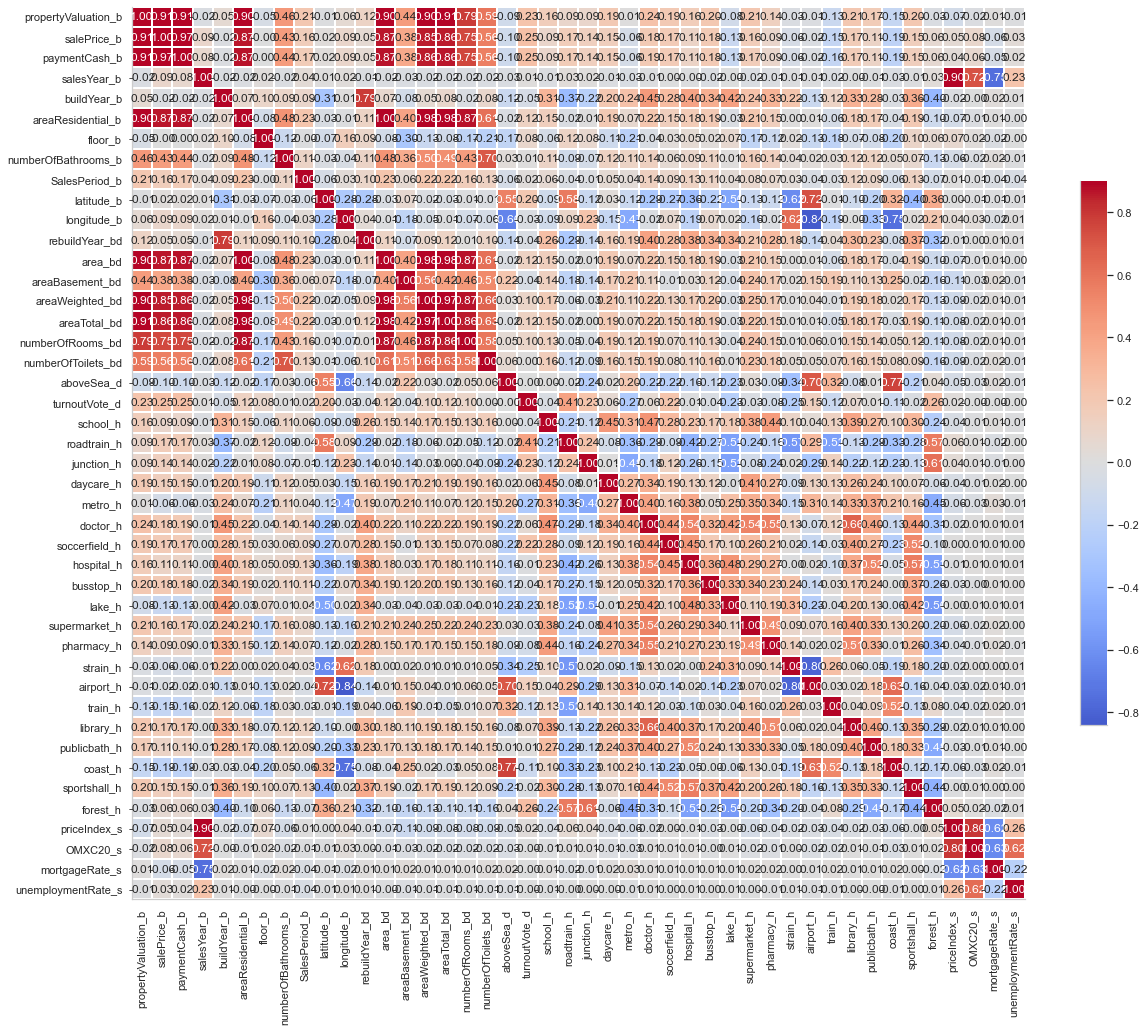

In [352]:
# # Heat map all numeric variables
cm = numerics.corr(method='pearson')
hm = sns.heatmap(cm,  vmax=0.9, center=0, xticklabels=True, yticklabels=True,
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
hm.figure.set_size_inches(20,20)
plt.show()

In [353]:
corr_num_list = (cm.where(np.triu(np.ones(cm.shape), k=1).astype(np.bool))
                      .stack().sort_values(ascending=False))
corr_num_list.head(35) 


areaResidential_b    area_bd              1.00
                     areaTotal_bd         0.98
area_bd              areaTotal_bd         0.98
areaResidential_b    areaWeighted_bd      0.98
area_bd              areaWeighted_bd      0.98
salePrice_b          paymentCash_b        0.97
areaWeighted_bd      areaTotal_bd         0.97
propertyValuation_b  salePrice_b          0.91
                     areaTotal_bd         0.91
                     paymentCash_b        0.91
                     area_bd              0.90
                     areaResidential_b    0.90
                     areaWeighted_bd      0.90
salesYear_b          priceIndex_s         0.90
paymentCash_b        areaResidential_b    0.87
                     area_bd              0.87
areaWeighted_bd      numberOfRooms_bd     0.87
areaResidential_b    numberOfRooms_bd     0.87
area_bd              numberOfRooms_bd     0.87
salePrice_b          areaResidential_b    0.87
                     area_bd              0.87
paymentCash_b

In [354]:
corr_num_list.tail(20)

sportshall_h  forest_h         -0.44
metro_h       forest_h         -0.45
longitude_b   metro_h          -0.47
publicbath_h  forest_h         -0.48
junction_h    metro_h          -0.48
latitude_b    lake_h           -0.50
roadtrain_h   lake_h           -0.52
junction_h    lake_h           -0.52
roadtrain_h   train_h          -0.52
hospital_h    forest_h         -0.53
lake_h        forest_h         -0.56
roadtrain_h   strain_h         -0.57
priceIndex_s  mortgageRate_s   -0.62
latitude_b    strain_h         -0.62
OMXC20_s      mortgageRate_s   -0.63
longitude_b   aboveSea_d       -0.66
              coast_h          -0.75
salesYear_b   mortgageRate_s   -0.75
strain_h      airport_h        -0.80
longitude_b   airport_h        -0.84
dtype: float64

In [355]:
#numerics.corr()['LoanAmount'][:]
numerics.corrwith(numerics['salePrice_b']).sort_values(ascending=False)

salePrice_b            1.00
paymentCash_b          0.97
propertyValuation_b    0.91
area_bd                0.87
areaResidential_b      0.87
areaTotal_bd           0.86
areaWeighted_bd        0.85
numberOfRooms_bd       0.75
numberOfToilets_bd     0.56
numberOfBathrooms_b    0.43
areaBasement_bd        0.38
turnoutVote_d          0.25
doctor_h               0.18
busstop_h              0.18
soccerfield_h          0.17
library_h              0.17
roadtrain_h            0.17
supermarket_h          0.16
SalesPeriod_b          0.16
daycare_h              0.15
sportshall_h           0.15
junction_h             0.14
publicbath_h           0.11
hospital_h             0.11
salesYear_b            0.09
pharmacy_h             0.09
school_h               0.09
longitude_b            0.09
OMXC20_s               0.08
forest_h               0.06
rebuildYear_bd         0.05
priceIndex_s           0.05
unemploymentRate_s     0.03
latitude_b             0.02
floor_b               -0.00
buildYear_b         

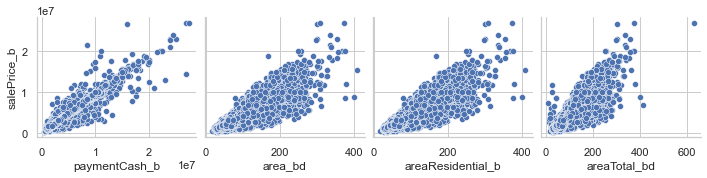

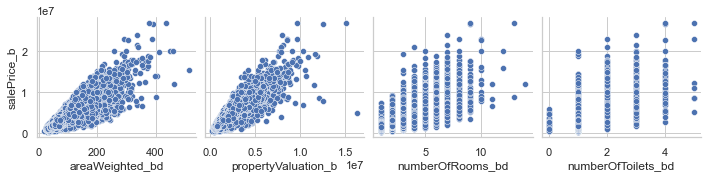

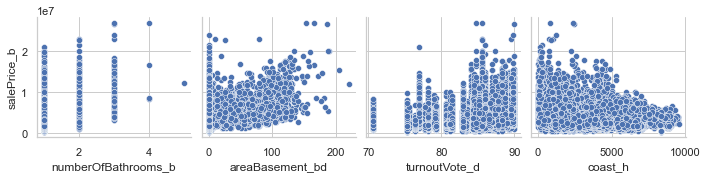

In [356]:

sns.pairplot(data=numerics,
                  y_vars=['salePrice_b'],
                  x_vars=['paymentCash_b', 'area_bd', 'areaResidential_b', 'areaTotal_bd'])
sns.pairplot(data=numerics,
                  y_vars=['salePrice_b'],
                  x_vars=[ 'areaWeighted_bd', 'propertyValuation_b', 'numberOfRooms_bd', 'numberOfToilets_bd'])
sns.pairplot(data=numerics,
                  y_vars=['salePrice_b'],
                  x_vars=['numberOfBathrooms_b', 'areaBasement_bd', 'turnoutVote_d', 'coast_h'])



In [357]:
numerics.columns

Index(['propertyValuation_b', 'salePrice_b', 'paymentCash_b', 'salesYear_b',
       'buildYear_b', 'areaResidential_b', 'floor_b', 'numberOfBathrooms_b',
       'SalesPeriod_b', 'latitude_b', 'longitude_b', 'rebuildYear_bd',
       'area_bd', 'areaBasement_bd', 'areaWeighted_bd', 'areaTotal_bd',
       'numberOfRooms_bd', 'numberOfToilets_bd', 'aboveSea_d', 'turnoutVote_d',
       'school_h', 'roadtrain_h', 'junction_h', 'daycare_h', 'metro_h',
       'doctor_h', 'soccerfield_h', 'hospital_h', 'busstop_h', 'lake_h',
       'supermarket_h', 'pharmacy_h', 'strain_h', 'airport_h', 'train_h',
       'library_h', 'publicbath_h', 'coast_h', 'sportshall_h', 'forest_h',
       'priceIndex_s', 'OMXC20_s', 'mortgageRate_s', 'unemploymentRate_s'],
      dtype='object')

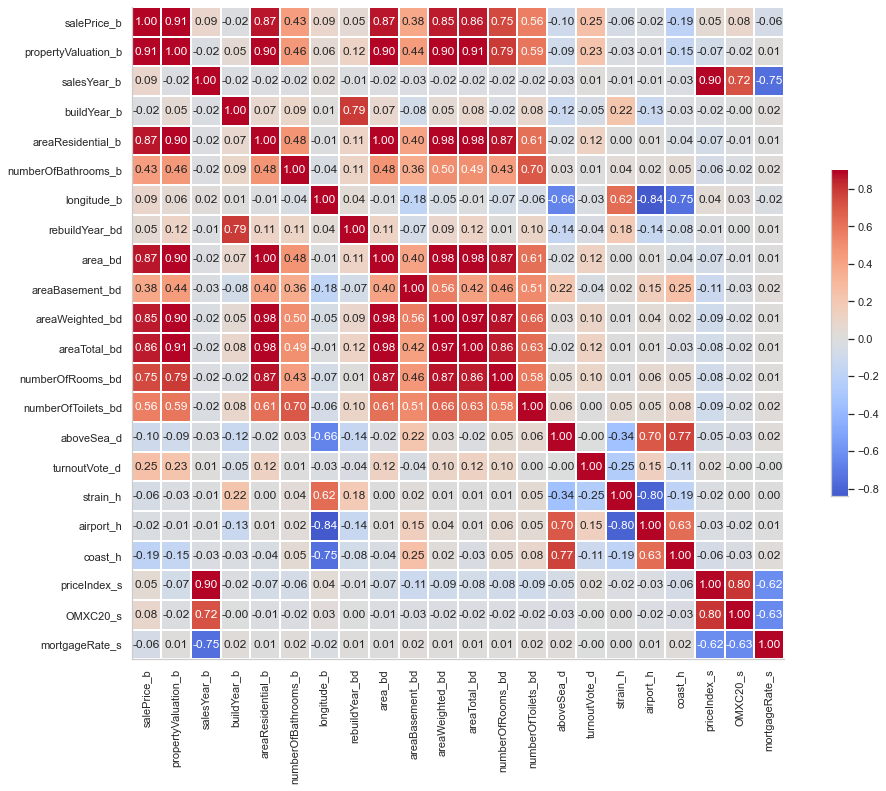

In [358]:
# All over abs(0.75)

most_corr = ['salePrice_b', 'propertyValuation_b', 'salesYear_b',
       'buildYear_b', 'areaResidential_b',
       'numberOfBathrooms_b', 'longitude_b',
       'rebuildYear_bd', 'area_bd', 'areaBasement_bd', 'areaWeighted_bd',
       'areaTotal_bd', 'numberOfRooms_bd', 'numberOfToilets_bd', 'aboveSea_d',
       'turnoutVote_d', 'strain_h', 'airport_h', 'coast_h', 'priceIndex_s', 'OMXC20_s', 'mortgageRate_s']

plt.rcParams['font.size'] = 12

# Heast map most correlated
cm = numerics[most_corr].corr(method='pearson')

hm = sns.heatmap(cm,  vmax=0.9, center=0, xticklabels=True, yticklabels=True,
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()

hm.figure.set_size_inches(17,12)
plt.show()

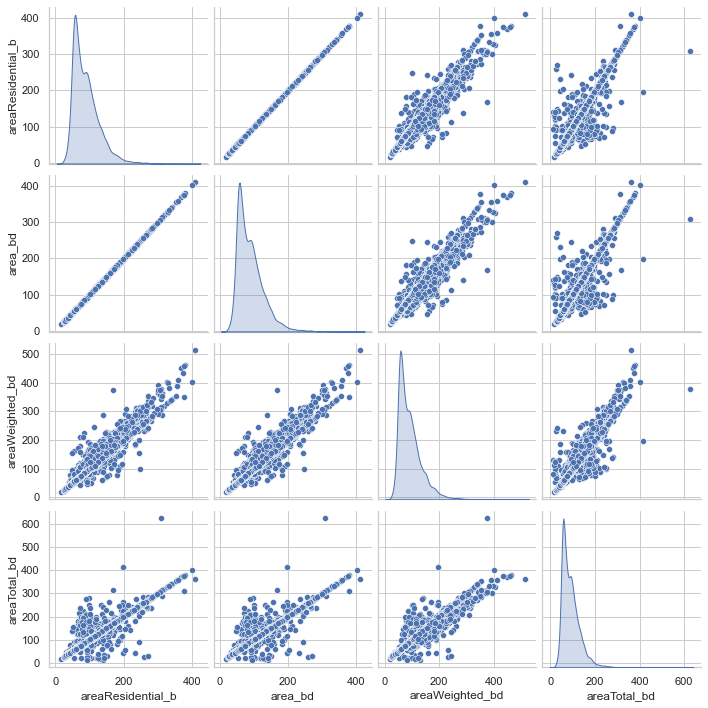

In [359]:
sns.pairplot(numerics[['areaResidential_b','area_bd', 'areaWeighted_bd',
       'areaTotal_bd']], diag_kind='kde')

In [360]:
# # List of those that most likely will not be used in the model
# # payment cash, AVM pris, postal id, Area, Total area, area resedential, latitude, longitude, number of floors, m2 price 
# # All other areas than weighted area


* #### Categoricals

In [361]:
nonnumerics = cleaning.select_dtypes(exclude=['float64', 'int64'])
nonnumerics.dtypes

address_b                    object
street_b                     object
streetName_b                 object
city_b                       object
valuationDate_b      datetime64[ns]
saleDate_b           datetime64[ns]
itemTypeName_b               object
propertyType_b               object
toilet.content_b             object
bath.content_b               object
energyMark_b                 object
unitUsage_bd                 object
kitchen.content_d            object
outerwall_d                  object
roof_d                       object
heating_d                    object
radonRisk_d                  object
noise_d                      object
floodingRisk_d               object
breakinRisk_d                object
biggestParty_d               object
electionArea_d               object
quarter_b                    object
dtype: object

In [362]:
# # Address

cleaning['address_b'] = cleaning['address_b'].astype('category')

# # Will not be used in the model, but is a unique identifier

In [363]:
# # Street

cleaning['street_b'] = cleaning['street_b'].astype('category')

# # Unnecesary since we have address

In [364]:
# # Street name

cleaning['streetName_b'] = cleaning['streetName_b'].astype('category')

# # Unnecesary since we have address

In [367]:
# # Postal Id (zipcode)

cleaning['postalId_b'] = cleaning['postalId_b'].astype('category')

bins = [0,     1100,        1200,       1300,        1400,        1450,        1500,       1600,         1700,
        1800,        1850,      1900,        2000,  2001,   2101,  2151,  2201,  2301,   2401,  2451,   2501,
        2701,  2721]
names = ['<1100', '1100-1200', '1200-1300', '1300-1400','1400-1450', '1450-1500', '1500-1600', '1600-1700',
         '1700-1800', '1800-1850','1850-1900','1900-2000','2000','2100','2150','2200','2300', '2400', '2450',
         '2500', '2700', '2720']
d = dict(enumerate(names,1))
cleaning['postalId_b_range'] = np.vectorize(d.get)(np.digitize(cleaning['postalId_b'],bins))
cleaning['postalId_b_range'] = cleaning.postalId_b_range.astype('category')


# # It turns out that 248 observations have either 2770 (Kastrup) or 2900 (Hellerup),
# # and these should therefore be removed. Bring us down to 30122 observations
# # Range will be used in the model rather than postalId, since too many unique numbers

# # CELL MUST FOR SOME REASON BE RUN TWICE

In [368]:
cleaning = cleaning.loc[~cleaning["postalId_b_range"].isin(["None"])]
cleaning['postalId_b_range'] = cleaning['postalId_b_range'].astype('category')
len(cleaning)


29830

In [369]:
# # City
cleaning['city_b'] = cleaning['city_b'].astype('category')

# # This could be used as placement variable rather than postalId range.
# # But posatlIdRange has more categories, so most likely better.

In [370]:
# # Valuation date
# # Datetime variable, so won't be used
# # Also almost no variation, so could be candidate to show distribution (but bad one)



In [371]:
# # Sales date
# # Also datetime variable, which will not be used. For time quarters are used in stead.


In [372]:
# # Item type
cleaning['itemTypeName_b'] = cleaning['itemTypeName_b'].astype('category')
cleaning['itemTypeName_b'].value_counts()
# Candidate for showing bar diagram because more variety in distribution, so variable should be used

Ejerlejlighed    26190
Villa             2386
Rækkehus          1254
Name: itemTypeName_b, dtype: int64

In [373]:
# # Property type
cleaning['propertyType_b'] = cleaning.propertyType_b.astype('category')
cleaning['propertyType_b'].value_counts()
# # This variable carries very little information, make bar diagram and throw out

Egentlig beboelseslejlighed (boligenhed med eget køkken)                                  29750
Enkeltværelse (boligenhed med fast kogeinstallation, fælles køkken eller intet køkken)       80
Name: propertyType_b, dtype: int64

In [374]:
# # Toilet information
cleaning['toilet.content_b'] = cleaning['toilet.content_b'].astype('category')
cleaning['toilet.content_b'].value_counts()

# # This variable carries very little information, will most likely not be used
# # Also since it can be assumed to go under number of bathrooms
# # Again make bar diagram

Vandskyllende toiletter i bolig- eller erhvervsenheden                            29781
Vandskyllende toilet udenfor enheden                                                 33
Anden type toilet udenfor enheden eller intet toilet i forbindelse med enheden       16
Name: toilet.content_b, dtype: int64

In [375]:
# # Bath information
cleaning['bath.content_b'] = cleaning['bath.content_b'].astype('category')
cleaning['bath.content_b'].value_counts()

# # This variable carries very little information (very few not having bath), will most likely not be used
# # Also since it can be assumed to go under number of bathrooms
# # Again make bar diagram

Badeværelser i enheden                              29498
Hverken badeværelse eller adgang til badeværelse      273
Adgang til badeværelse                                 59
Name: bath.content_b, dtype: int64

In [376]:
# # Kitchen content
cleaning['kitchen.content_d'] = cleaning['kitchen.content_d'].astype('category')
cleaning['kitchen.content_d'].value_counts()
# # This variable carries very little information, will most likely not be used

Eget køkken med afløb                            29768
Fast kogeinstallation i værelse eller på gang       39
Ingen fast kogeinstallation                         12
Adgang til fælles køkken                            11
Name: kitchen.content_d, dtype: int64

In [377]:
# # Energy mark
cleaning['energyMark_b'] = cleaning['energyMark_b'].astype('category')
cleaning['energyMark_b']=cleaning.energyMark_b.replace({"a1": "a"},regex=True)
cleaning['energyMark_b']=cleaning.energyMark_b.replace({"a2": "a"},regex=True)
cleaning['energyMark_b']=cleaning.energyMark_b.replace({"a2010": "a"},regex=True)
cleaning['energyMark_b']=cleaning.energyMark_b.replace({"a2015": "a"},regex=True)
cleaning['energyMark_b']=cleaning.energyMark_b.replace({"a2020": "a"},regex=True)
cleaning['energyMark_b'].value_counts()

ordered_Energy = ['a','b','c','d','e','f','g']
cleaning['energyMark_b'] = cleaning['energyMark_b'].astype('category').cat.set_categories(ordered_Energy,
                                                                                          ordered = True)
cleaning['energyMark_b'].value_counts()

# # Also use as example with bar plot where there is more variety

d    13106
c     6818
e     4033
a     2557
b     2167
f      861
g      288
Name: energyMark_b, dtype: int64

In [378]:
# # Unit usage (what kind of housing it is) Should put some categories together.
cleaning.loc[cleaning['unitUsage_bd']=="Bolig i etageejendom, flerfamiliehus eller to-familiehus","unitUsage_bd"] \
                                                    ="Bolig i etageejendom (flerfamiliehus, herunder 2-familiehus)"
cleaning.loc[cleaning['unitUsage_bd']=="Række- og kædehus","unitUsage_bd"] \
                                                    ="Række-, kæde- eller dobbelthus"
cleaning.loc[cleaning['unitUsage_bd']=="Dobbelthus","unitUsage_bd"] \
                                                    ="Række-, kæde- eller dobbelthus"
cleaning.loc[cleaning['unitUsage_bd']=="Række-, kæde- eller dobbelthus (lodret adskillelse mellem enhederne).",
                                                     "unitUsage_bd"] \
                                                    ="Række-, kæde- eller dobbelthus"
cleaning.loc[cleaning['unitUsage_bd']=="Række-, kæde- og klyngehus","unitUsage_bd"] \
                                                    ="Række-, kæde- eller dobbelthus"
cleaning.loc[cleaning['unitUsage_bd']=="Fritliggende enfamiliehus","unitUsage_bd"] \
                                                    ="Fritliggende enfamilieshus (parcelhus)"
cleaning['unitUsage_bd'] = cleaning['unitUsage_bd'].astype('category')
cleaning['unitUsage_bd'].value_counts()

Bolig i etageejendom (flerfamiliehus, herunder 2-familiehus)    25846
Fritliggende enfamilieshus (parcelhus)                           2399
Række-, kæde- eller dobbelthus                                   1511
Kollegium                                                          70
Anden enhed til helårsbeboelse                                      4
Name: unitUsage_bd, dtype: int64

In [379]:
# # Kitchen content

cleaning['kitchen.content_d'] = cleaning['kitchen.content_d'].astype('category')
cleaning['kitchen.content_d'].value_counts()
# # This variable carries very little information, will most likely not be used, candidate for bar plot

Eget køkken med afløb                            29768
Fast kogeinstallation i værelse eller på gang       39
Ingen fast kogeinstallation                         12
Adgang til fælles køkken                            11
Name: kitchen.content_d, dtype: int64

In [380]:
# # Outerwall material
cleaning['outerwall_d'] = cleaning['outerwall_d'].astype('category')
cleaning['outerwall_d'].value_counts()

Mursten                        25608
Betonelementer                  2363
Andet materiale                  913
Metal                            260
Letbetonsten                     226
Fibercement uden asbest          154
Fibercement herunder asbest      148
Træ                               65
Bindingsværk                      52
Glas                              41
Name: outerwall_d, dtype: int64

In [381]:
# # Roof material
cleaning['roof_d'] = cleaning['roof_d'].astype('category')
cleaning['roof_d'].value_counts()

Tegl                           10699
Fibercement herunder asbest     6753
Tagpap med lille hældning       4772
Tagpap med stor hældning        4256
Andet materiale                 1901
Betontagsten                     504
Metal                            473
Fibercement uden asbest          347
Levende tage                      97
Glas                              27
Stråtag                            1
Name: roof_d, dtype: int64

In [382]:
# # Heating installation
cleaning['heating_d'] = cleaning['heating_d'].astype('category')
cleaning['heating_d'].value_counts()

Fjernvarme/blokvarme                 29513
Elvarme                                156
Centralvarme med én fyringsenhed        93
Ovn til fast og flydende brændsel       38
Varmepumpe                              17
Blandet                                 12
Gasradiator                              1
Name: heating_d, dtype: int64

In [383]:
# # Radon risk
ordered_radiation = ['Meget lav','lav','medium','høj','meget høj']
cleaning['radonRisk_d'] = cleaning['radonRisk_d'].astype('category').cat.set_categories(ordered_radiation,
                                                                                        ordered = True)
cleaning['radonRisk_d'].value_counts()

Meget lav    25579
medium        2751
høj            782
lav            705
meget høj       13
Name: radonRisk_d, dtype: int64

In [384]:
# # Noise measurement
cleaning.loc[cleaning['noise_d']=="Mangler","noise_d"]="Ingen trafikstøj"
ordered_noise = ['Ingen trafikstøj', '55-60 dB','60-65 dB','65-70 dB','70-75 dB','over 75 dB']
cleaning['noise_d'] = cleaning['noise_d'].astype('category').cat.set_categories(ordered_noise, ordered = True)
cleaning['noise_d'].value_counts()

Ingen trafikstøj    14858
55-60 dB             7731
60-65 dB             4349
65-70 dB             2029
70-75 dB              785
over 75 dB             78
Name: noise_d, dtype: int64

In [385]:
# # Flooding risk

ordered_flooding = ['er lav risiko', 'kan være risiko', 'er høj risiko']
cleaning['floodingRisk_d'] = cleaning['floodingRisk_d'].astype('category').cat.set_categories(ordered_flooding,
                                                                                              ordered = True)
cleaning['floodingRisk_d'].value_counts()

kan være risiko    26341
er høj risiko       2963
er lav risiko        526
Name: floodingRisk_d, dtype: int64

In [386]:
# # Break in risk

ordered_breakin = ['lav', 'mellem', 'høj', 'meget høj']
cleaning['breakinRisk_d'] = cleaning['breakinRisk_d'].astype('category').cat.set_categories(ordered_breakin,
                                                                                              ordered = True)
cleaning['breakinRisk_d'].value_counts()

lav          27055
mellem        2516
høj            254
meget høj        5
Name: breakinRisk_d, dtype: int64

In [387]:
# # Biggest party

ordered_parties = ['enhedslisten', 'socialdemokratiet', 'radikale', 'venstre']
cleaning['biggestParty_d'] = cleaning['biggestParty_d'].astype('category').cat.set_categories(ordered_parties,
                                                                                              ordered = True)
cleaning['biggestParty_d'].value_counts()


socialdemokratiet    10491
enhedslisten          7496
venstre               7192
radikale              4651
Name: biggestParty_d, dtype: int64

In [388]:
# # Election area
cleaning['electionArea_d'] = cleaning['electionArea_d'].astype('category')

# # Unnecessary, already have zip codes for positioning

In [389]:
# # quarter

quarters = ['2016Q1','2016Q2','2016Q3','2016Q4',
            '2017Q1','2017Q2','2017Q3','2017Q4',
            '2018Q1','2018Q2','2018Q3','2018Q4',
            '2019Q1','2019Q2','2019Q3','2019Q4',
            '2020Q1','2020Q2','2020Q3','2020Q4']
cleaning['quarter_b'] = cleaning['quarter_b'].astype('category').cat.set_categories(quarters,
                                                                                              ordered = True)

# # Should make a simpler one, which only takes the quarter

In [390]:
# # Quarter simpler

cleaning['quarter0_b'] = cleaning['quarter_b'].str[4:]
quarters = ['Q1','Q2','Q3','Q4']
cleaning['quarter0_b'] = cleaning['quarter0_b'].astype('category').cat.set_categories(quarters,
                                                                                              ordered = True)
cleaning['quarter0_b'].value_counts()

Q3    8007
Q2    7898
Q4    7207
Q1    6718
Name: quarter0_b, dtype: int64

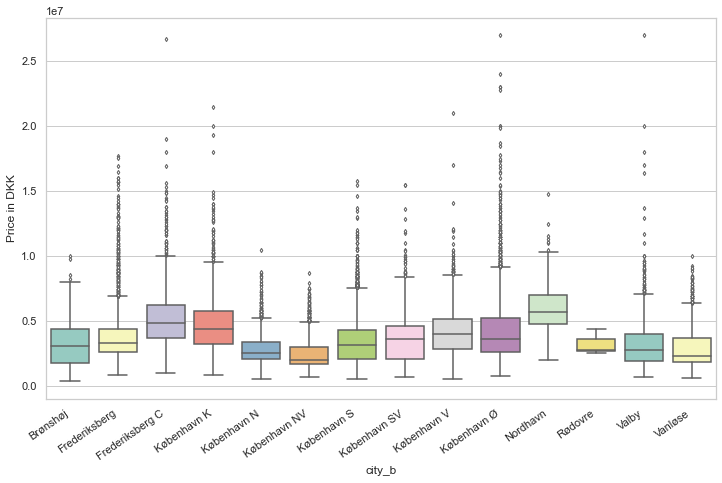

In [391]:
# # Boxplot with place variables

plt.rcParams["figure.figsize"] = (12,7)

flierprops = dict(markerfacecolor='1', markersize=3,
              linestyle='none')

sns.boxplot(x="city_b", y="salePrice_b", data=cleaning , palette="Set3", flierprops=flierprops)
plt.xticks(rotation=35, horizontalalignment='right')
plt.ylabel('Price in DKK')
plt.show()

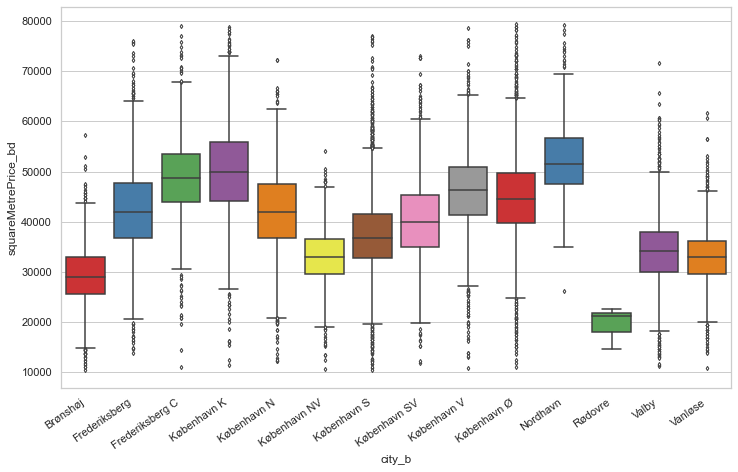

In [392]:
# # Boxplot with place variables

plt.rcParams["figure.figsize"] = (12,7)

flierprops = dict(markerfacecolor='1', markersize=3,
              linestyle='none')

sns.boxplot(x="city_b", y="squareMetrePrice_bd", data=cleaning , palette="Set1", flierprops=flierprops)
plt.xticks(rotation=35, horizontalalignment='right')
plt.rc('axes', labelsize=20)
plt.show()

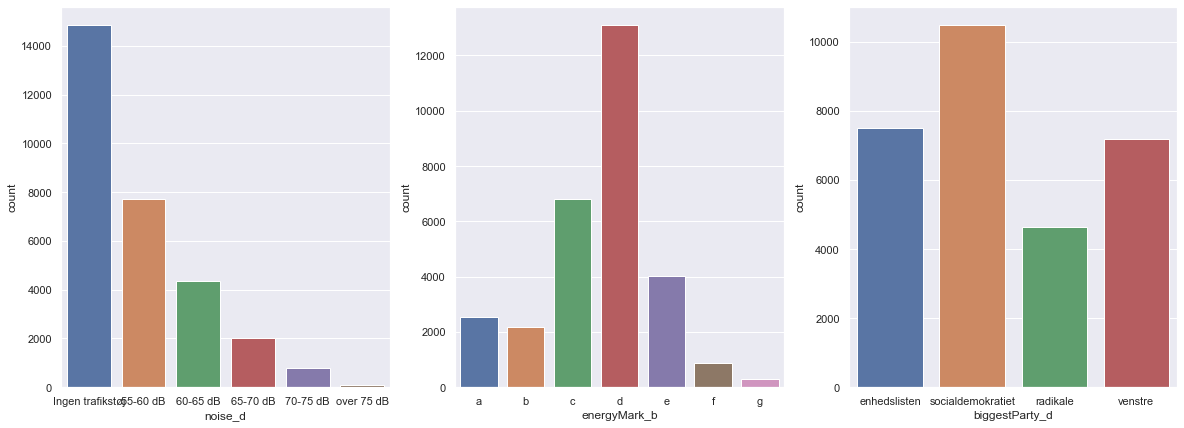

In [393]:
plt.rcParams["figure.figsize"] = (20,7)
sns.set_theme(style="darkgrid")
f, axes = plt.subplots(1, 3)
sns.countplot(x='noise_d', data=cleaning, ax=axes[0])
sns.countplot(x='energyMark_b', data=cleaning, ax=axes[1])
sns.countplot(x='biggestParty_d', data=cleaning, ax=axes[2])
plt.show()

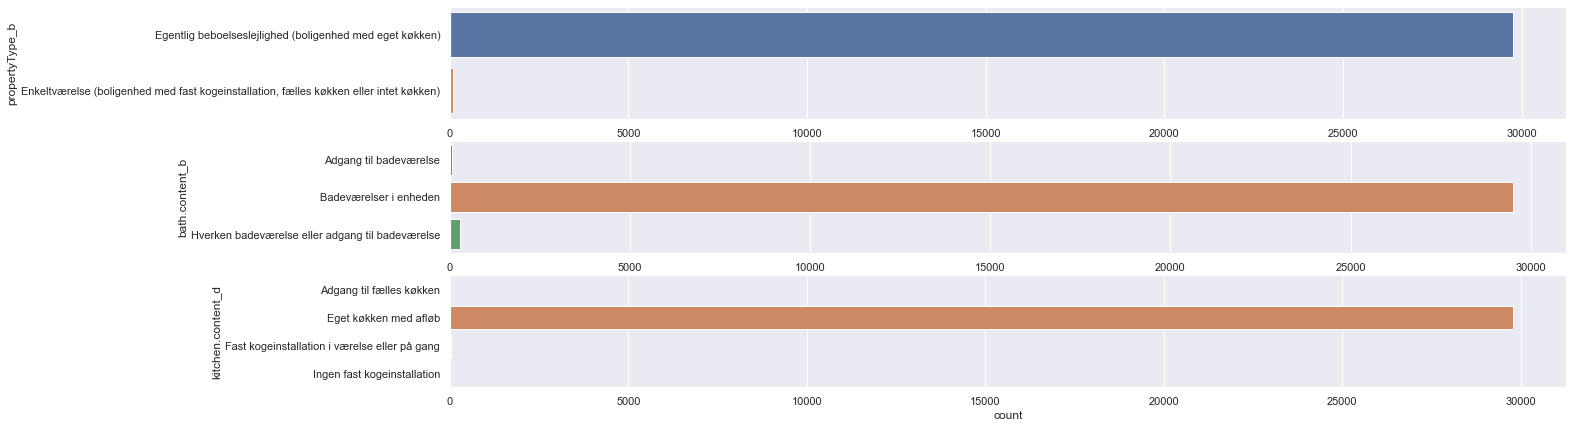

In [394]:
sns.set_theme(style="darkgrid")
f, axes = plt.subplots(3, 1)
sns.countplot(y='propertyType_b', data=cleaning, ax=axes[0])
sns.countplot(y='bath.content_b', data=cleaning, ax=axes[1])
sns.countplot(y='kitchen.content_d', data=cleaning, ax=axes[2])
plt.show()
#'propertyType_b' 'bath.content_b' 'kitchen.content_d', 'kitchen.content_d'

In [395]:
# # Categoricals to be dropped:
# # address_b, street_b, streetName_b, city_b, valuationDate_b, saleDate_b, propertyType_b, toilet.content_b,
# # bath.content_b , kitchen.content_d, electionArea_d, quarter

In [397]:
cleaning.drop(columns=['address_b', 'street_b', 'streetName_b', 'postalId_b', 'city_b',
       'valuationDate_b', 'saleDate_b', # 'paymentCash_b',  'AVM_pris_d',
       'propertyType_b', 'areaResidential_b',
       'numberOfFloors_b', 'toilet.content_b', 'bath.content_b', 'latitude_b',
       'longitude_b', 'area_bd', 'areaTotal_bd',
       'kitchen.content_d', 'electionArea_d',
       'quarter_b', 'squareMetrePrice_bd'], inplace=True)

In [398]:
# # Ordinal categorical variables

In [399]:
# # Energy mark

energy_mapping = {'a': 1,'b': 2,'c': 3,'d': 4,'e': 5,'f': 6 ,'g': 7}
cleaning['energyMark_b'] = cleaning['energyMark_b'].map(energy_mapping)


In [400]:
# # Radon risk

radon_mapping = {'Meget lav': 1,'lav': 2,'medium': 3,'høj': 4,'meget høj': 5}
cleaning['radonRisk_d'] = cleaning['radonRisk_d'].map(radon_mapping)


In [401]:
# # Noise 
noise_mapping = {'Ingen trafikstøj': 1, '55-60 dB': 2,'60-65 dB': 3,'65-70 dB': 4,'70-75 dB': 5,'over 75 dB': 6}
cleaning['noise_d'] = cleaning['noise_d'].map(noise_mapping)

In [402]:
# # Flooding 

flooding_mapping = {'er lav risiko': 1, 'kan være risiko': 2, 'er høj risiko': 3}
cleaning['floodingRisk_d'] = cleaning['floodingRisk_d'].map(flooding_mapping)


In [403]:
# # Break in risk


breakin_mapping = {'lav': 1, 'mellem': 2, 'høj': 3, 'meget høj': 4}
cleaning['breakinRisk_d'] = cleaning['breakinRisk_d'].map(breakin_mapping)


In [404]:
# # Biggest party

party_mapping = {'enhedslisten': 1, 'socialdemokratiet': 2, 'radikale': 3, 'venstre': 4}
cleaning['biggestParty_d'] = cleaning['biggestParty_d'].map(party_mapping)


In [405]:
# # Quarter simpler

quarter_mapping = {'Q1': 1,'Q2': 2,'Q3': 3,'Q4': 4}
cleaning['quarter0_b'] = cleaning['quarter0_b'].map(quarter_mapping)


In [406]:
len(cleaning.columns)

53

In [407]:
# # One-hot encoding

finalData = pd.get_dummies(cleaning, columns=['postalId_b_range', 'itemTypeName_b', 'unitUsage_bd', 'outerwall_d',
                                         'roof_d', 'heating_d'], drop_first=True)

In [408]:
len(finalData.columns)

99

In [409]:
finalData.head()

,propertyValuation_b,salePrice_b,paymentCash_b,salesYear_b,buildYear_b,floor_b,numberOfBathrooms_b,energyMark_b,SalesPeriod_b,rebuildYear_bd,areaBasement_bd,areaWeighted_bd,numberOfRooms_bd,numberOfToilets_bd,AVM_pris_d,radonRisk_d,noise_d,floodingRisk_d,aboveSea_d,breakinRisk_d,biggestParty_d,turnoutVote_d,school_h,roadtrain_h,junction_h,daycare_h,metro_h,doctor_h,soccerfield_h,hospital_h,busstop_h,lake_h,supermarket_h,pharmacy_h,strain_h,airport_h,train_h,library_h,publicbath_h,coast_h,sportshall_h,forest_h,priceIndex_s,OMXC20_s,mortgageRate_s,unemploymentRate_s,quarter0_b,postalId_b_range_1200-1300,postalId_b_range_1300-1400,postalId_b_range_1400-1450,postalId_b_range_1450-1500,postalId_b_range_1500-1600,postalId_b_range_1600-1700,postalId_b_range_1700-1800,postalId_b_range_1800-1850,postalId_b_range_1850-1900,postalId_b_range_1900-2000,postalId_b_range_2000,postalId_b_range_2100,postalId_b_range_2150,postalId_b_range_2200,postalId_b_range_2300,postalId_b_range_2400,postalId_b_range_2450,postalId_b_range_2500,postalId_b_range_2700,postalId_b_range_2720,postalId_b_range_<1100,itemTypeName_b_Rækkehus,itemTypeName_b_Villa,"unitUsage_bd_Bolig i etageejendom (flerfamiliehus, herunder 2-familiehus)",unitUsage_bd_Fritliggende enfamilieshus (parcelhus),unitUsage_bd_Kollegium,"unitUsage_bd_Række-, kæde- eller dobbelthus",outerwall_d_Betonelementer,outerwall_d_Bindingsværk,outerwall_d_Fibercement herunder asbest,outerwall_d_Fibercement uden asbest,outerwall_d_Glas,outerwall_d_Letbetonsten,outerwall_d_Metal,outerwall_d_Mursten,outerwall_d_Træ,roof_d_Betontagsten,roof_d_Fibercement herunder asbest,roof_d_Fibercement uden asbest,roof_d_Glas,roof_d_Levende tage,roof_d_Metal,roof_d_Stråtag,roof_d_Tagpap med lille hældning,roof_d_Tagpap med stor hældning,roof_d_Tegl,heating_d_Centralvarme med én fyringsenhed,heating_d_Elvarme,heating_d_Fjernvarme/blokvarme,heating_d_Gasradiator,heating_d_Ovn til fast og flydende brændsel,heating_d_Varmepumpe
0,"1,550,000.00","2,495,000.00","2,195,000.00",2016,1937,2,1,4,142,1937,0.00,80.00,3,1,"3,071,796.00",1,2,2,11.00,1,2,84.00,689.72,"4,331.75","3,967.99",773.39,742.41,"1,184.70","1,524.02","1,722.16",192.06,"1,940.83",738.04,"1,121.32",673.62,"12,941.07","3,555.35","1,230.13","2,252.16","5,439.88","1,524.02","5,086.90",100.00,"1,039.00",1.76,4.50,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,"1,550,000.00","2,715,000.00","2,795,000.00",2016,1937,1,1,4,30,1937,0.00,80.00,4,1,"3,246,509.00",1,2,2,11.00,1,2,84.00,689.72,"4,331.75","3,967.99",773.39,742.41,"1,184.70","1,524.02","1,722.16",192.06,"1,940.83",738.04,"1,121.32",673.62,"12,941.07","3,555.35","1,230.13","2,252.16","5,439.88","1,524.02","5,086.90",105.86,"1,038.00",2.22,4.30,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,"1,550,000.00","3,195,000.00","3,195,000.00",2017,1937,1,1,4,9,1937,0.00,81.00,4,1,"3,358,487.00",1,2,2,11.00,1,2,84.00,689.72,"4,331.75","3,967.99",773.39,742.41,"1,184.70","1,524.02","1,722.16",192.06,"1,940.83",738.04,"1,121.32",673.62,"12,941.07","3,555.35","1,230.13","2,252.16","5,439.88","1,524.02","5,086.90",112.29,"1,154.00",2.13,4.30,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,"2,600,000.00","4,345,000.00","4,345,000.00",2016,2011,2,1,2,79,2011,0.00,94.00,3,1,"5,249,692.00",1,1,2,8.90,1,3,89.30,739.53,"6,205.43","3,844.87",362.32,369.77,298.78,935.69,"1,062.71",289.76,"1,520.77",258.77,310.81,"1,498.58","10,796.24","2,507.55",605.22,528.14,"3,107.38","1,033.28","7,061.53",100.00,"1,039.00",1.76,4.50,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,"3,550,000.00","6,495,000.00","6,495,000.00",2017,2011,4,1,2,6,2011,0.00,124.00,3,1,"6,596,024.00",1,1,2,8.90,1,3,89.30,739.53,"6,205.43","3,844.87",362.32,369.77,298.78,935.69,"1,062.71",289.76,"1,520.77",258.77,310.81,"1,498.58","10,7

In [410]:
finalData.corrwith(finalData['salePrice_b']).sort_values(ascending=False)

salePrice_b                                                                  1.00
paymentCash_b                                                                0.97
AVM_pris_d                                                                   0.94
propertyValuation_b                                                          0.91
areaWeighted_bd                                                              0.85
numberOfRooms_bd                                                             0.75
numberOfToilets_bd                                                           0.55
numberOfBathrooms_b                                                          0.43
areaBasement_bd                                                              0.37
unitUsage_bd_Fritliggende enfamilieshus (parcelhus)                          0.28
itemTypeName_b_Villa                                                         0.28
turnoutVote_d                                                                0.26
unitUsage_bd_Ræk

In [411]:
# # Heat map all numeric variables
cm = finalData.corr(method='pearson')

corr_all_list = (cm.where(np.triu(np.ones(cm.shape), k=1).astype(np.bool))
                      .stack().sort_values(ascending=False))
corr_all_list.head(35) 

itemTypeName_b_Villa     unitUsage_bd_Fritliggende enfamilieshus (parcelhus)   1.00
salePrice_b              paymentCash_b                                         0.97
                         AVM_pris_d                                            0.94
paymentCash_b            AVM_pris_d                                            0.93
propertyValuation_b      salePrice_b                                           0.91
                         paymentCash_b                                         0.91
itemTypeName_b_Rækkehus  unitUsage_bd_Række-, kæde- eller dobbelthus           0.90
propertyValuation_b      areaWeighted_bd                                       0.90
                         AVM_pris_d                                            0.90
salesYear_b              priceIndex_s                                          0.90
areaWeighted_bd          numberOfRooms_bd                                      0.87
                         AVM_pris_d                                         

In [412]:
corr_all_list.tail(20) 

numberOfRooms_bd                                                           unitUsage_bd_Bolig i etageejendom (flerfamiliehus, herunder 2-familiehus)   -0.53
itemTypeName_b_Rækkehus                                                    unitUsage_bd_Bolig i etageejendom (flerfamiliehus, herunder 2-familiehus)   -0.53
hospital_h                                                                 forest_h                                                                    -0.54
heating_d_Centralvarme med én fyringsenhed                                 heating_d_Fjernvarme/blokvarme                                              -0.54
roadtrain_h                                                                postalId_b_range_2300                                                       -0.54
areaWeighted_bd                                                            unitUsage_bd_Bolig i etageejendom (flerfamiliehus, herunder 2-familiehus)   -0.54
lake_h                                                    

In [413]:
finalData.columns

Index(['propertyValuation_b', 'salePrice_b', 'paymentCash_b', 'salesYear_b',
       'buildYear_b', 'floor_b', 'numberOfBathrooms_b', 'energyMark_b',
       'SalesPeriod_b', 'rebuildYear_bd', 'areaBasement_bd', 'areaWeighted_bd',
       'numberOfRooms_bd', 'numberOfToilets_bd', 'AVM_pris_d', 'radonRisk_d',
       'noise_d', 'floodingRisk_d', 'aboveSea_d', 'breakinRisk_d',
       'biggestParty_d', 'turnoutVote_d', 'school_h', 'roadtrain_h',
       'junction_h', 'daycare_h', 'metro_h', 'doctor_h', 'soccerfield_h',
       'hospital_h', 'busstop_h', 'lake_h', 'supermarket_h', 'pharmacy_h',
       'strain_h', 'airport_h', 'train_h', 'library_h', 'publicbath_h',
       'coast_h', 'sportshall_h', 'forest_h', 'priceIndex_s', 'OMXC20_s',
       'mortgageRate_s', 'unemploymentRate_s', 'quarter0_b',
       'postalId_b_range_1200-1300', 'postalId_b_range_1300-1400',
       'postalId_b_range_1400-1450', 'postalId_b_range_1450-1500',
       'postalId_b_range_1500-1600', 'postalId_b_range_1600-1700',


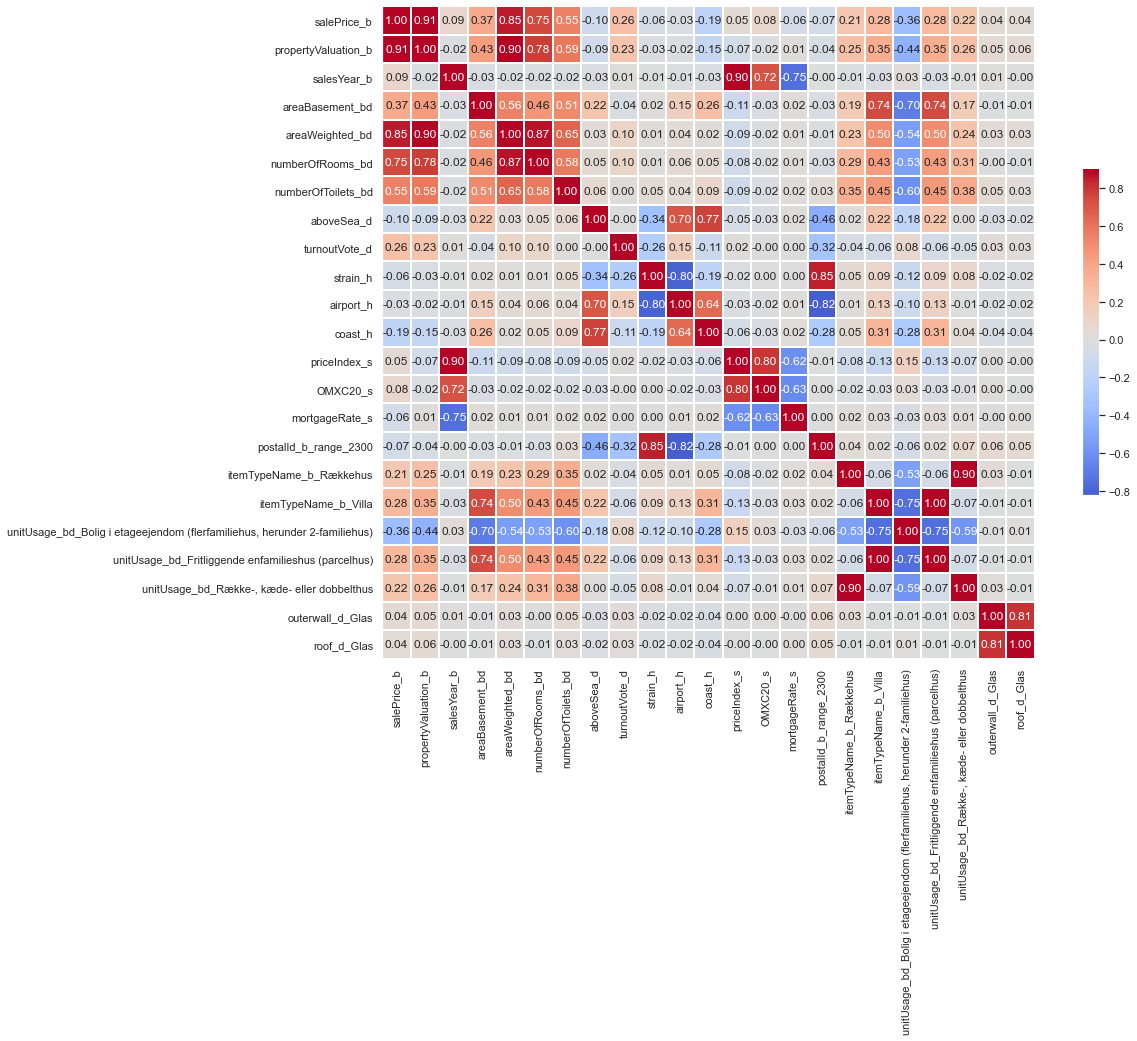

In [414]:

# All over abs(0.75)

most_corr = ['salePrice_b', 'propertyValuation_b', 'salesYear_b', 'areaBasement_bd', 'areaWeighted_bd',
'numberOfRooms_bd', 'numberOfToilets_bd', 'aboveSea_d', 'turnoutVote_d', 'strain_h', 'airport_h', 'coast_h',
'priceIndex_s', 'OMXC20_s', 'mortgageRate_s', 'postalId_b_range_2300',
'itemTypeName_b_Rækkehus', 'itemTypeName_b_Villa',
'unitUsage_bd_Bolig i etageejendom (flerfamiliehus, herunder 2-familiehus)',
'unitUsage_bd_Fritliggende enfamilieshus (parcelhus)', 'unitUsage_bd_Række-, kæde- eller dobbelthus',
'outerwall_d_Glas', 'roof_d_Glas']

plt.rcParams['font.size'] = 12

# Heast map most correlated
cm = finalData[most_corr].corr(method='pearson')

hm = sns.heatmap(cm,  vmax=0.9, center=0, xticklabels=True, yticklabels=True,
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()

hm.figure.set_size_inches(17,12)
plt.show()

In [415]:
finalData.drop(columns=['unitUsage_bd_Bolig i etageejendom (flerfamiliehus, herunder 2-familiehus)',
       'unitUsage_bd_Fritliggende enfamilieshus (parcelhus)',
       'unitUsage_bd_Kollegium', 'unitUsage_bd_Række-, kæde- eller dobbelthus'], inplace=True)

In [416]:
#finalData.to_csv('finalData.csv', index=False)

#finalData = pd.read_csv("finalData.csv")
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', None)

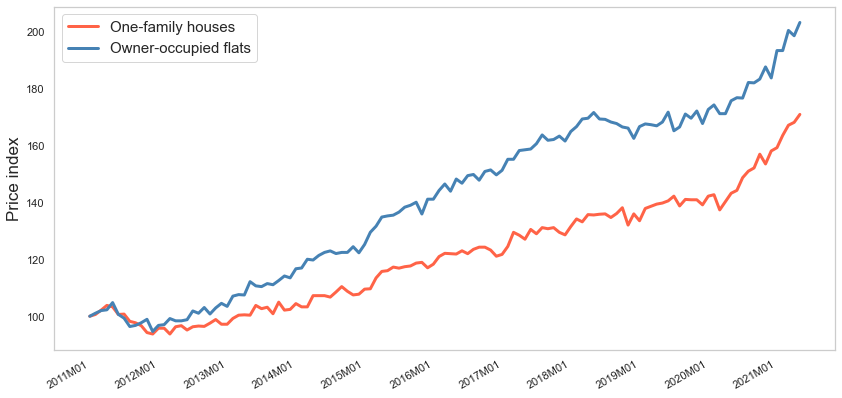

In [35]:
# # From EJ14 in Statbank, for capitol region of denmark only.
# # Shows that there is an upward trend in price development, meaning year will be a relevant predictor.

price_index = pd.read_csv('salePriceIndex2.csv', delimiter=',', header=1, skiprows=1)
price_index.drop(price_index.columns[[0, 1]], axis = 1, inplace = True)
price_index = price_index.drop([0, 1]).T
price_index = price_index.rename(columns=price_index.iloc[0]).drop(price_index.index[0:1])
price_index['One-family houses'] = price_index['One-family houses'] * 100 / price_index.loc['2011M01','One-family houses']
price_index['Owner-occupied flats, total'] = price_index['Owner-occupied flats, total'] * 100 / price_index.loc['2011M01','Owner-occupied flats, total']


plt.rcParams["figure.figsize"] = (14,7)

fig, ax = plt.subplots()
plt.plot(price_index['One-family houses'], c ='tomato', linewidth=3, label='One-family houses')
plt.plot(price_index['Owner-occupied flats, total'], c ='steelblue', linewidth=3, label='Owner-occupied flats')

fig.autofmt_xdate()
plt.ylabel('Price index')
plt.legend(fontsize=15)
plt.rc('axes', labelsize=17)
xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%12 != 0:
        tick.label1.set_visible(False)
        
# Hide grid lines
ax.grid(False)

plt.show()